In [2]:
import cv2
import os

In [3]:
filename = 'clip0005.MXF'
full_videopath = os.path.join('..', 'video', filename)
full_framepath = os.path.join('..', 'img', filename)
vidcap = cv2.VideoCapture(full_videopath)

### Videocapture

In [7]:
ret, frame = vidcap.read()

In [11]:
frame

numpy.ndarray

### Disect Video into Frames

In [3]:
filename = 'clip0005.MXF'
full_videopath = os.path.join('..', 'video', filename)
full_framepath = os.path.join('..', 'img', filename)
vidcap = cv2.VideoCapture(full_videopath)
try:
    os.mkdir(full_framepath, mode = 777)
except Exception as ex:
    print(ex)

success,image = vidcap.read()
count = 0
while success:
  file = os.path.join(full_framepath, "frame{}.bmp".format(count))
  cv2.imwrite(file, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  if not success:
    print('Could not load frame ', count)
  count += 1

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '..\\img\\clip0005.MXF'
Could not load frame  371


In [13]:
imageIndex = 18
file = os.path.join(full_framepath, "frame{}.bmp".format(imageIndex))
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

In [2]:
import tensorflow

## Background Subtractor

In [1]:
import cv2
import matplotlib.pyplot as plt 
filename = 'clip0005.MXF'
full_videopath = os.path.join('..', 'video', filename)
full_framepath = os.path.join('..', 'img', filename)
vidcap = cv2.VideoCapture(full_videopath)
fgbg = cv2.createBackgroundSubtractorMOG2()

In [73]:
# help(cv2.VideoWriter)

In [2]:
# frame.shape
frame_width = 1920
frame_height = 1080

In [3]:
output = cv2.VideoWriter('output2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

for i in range(50):

    ret, frame = vidcap.read()
    fgmask = fgbg.apply(frame)
    output.write(fgmask)

    if cv2.waitKey(25) & 0xFF == ord('q'):
      break


vidcap.release()
cv2.destroyAllWindows()

In [27]:
fgmask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 127, 255,   0],
       [  0,   0,   0, ...,   0,   0, 127],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

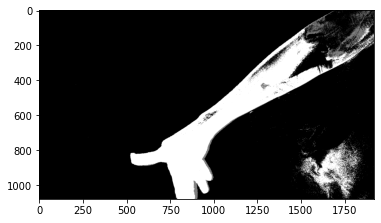

In [25]:
plt.imshow(fgmask, cmap="gray") 
plt.show() 

In [5]:
import numpy as np
import cv2

# <!-- cap = cv2.VideoCapture('vtest.avi') -->
vidcap = cv2.VideoCapture(full_videopath)

fgbg = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = vidcap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

vidcap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\rand.cpp:394: error: (-215:Assertion failed) !_mat.empty() in function 'cv::RNG::fill'


In [19]:
vidcap = cv2.VideoCapture(full_videopath)
ret, frame = vidcap.read()

In [22]:
newArray = np.broadcast((fgmask>127).astype('int'), )

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [23]:
newShape = np.empty(frame.shape)

In [25]:
transp = (fgmask>127).astype('int')

In [28]:
np.broadcast_to(transp, frame.shape)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1080,1920)  and requested shape (1080,1920,3)

In [ ]:

cap = vidcap
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractor

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()